# ニューラルネットの基礎

## 前回の課題
　　２入力１出力でニューロンは５個、最初の層は４個、次の層は１個とする。入力の値は９種類確認するものとして、[0.5 , 0.5]の時だけ１（１に近い値）を出力するようにする。また、他の場所では０（０に近い値）を出力するようにする。また、グラフも作成すること。

#### 課題の解答のコード（例）

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#解答はこの下に記入
def sigmoid(u):
    return 1/(1+np.exp(-u))
def neuron(xx,n):
    x=xx.copy()
    x.append(-1)
    u=x @ w[n] 
    o=sigmoid(u)
    return o

x=[[0,0],[0,0.5],[0,1],[0.5,0],[0.5,0.5],[1,0.5],[1,0],[1,0.5],[1,1]]  # 9種類の入力値
w1=np.array([100,0,40])
w2=np.array([-100,0,-60])
w3=np.array([0,100,40])
w4=np.array([0,-100,-60])
w5=np.array([100,100,100,100,350])
w=np.array([w1,w2,w3,w4,w5],dtype=object)  # 5個のニューロンのパラメータ（合計９個のパラメータ）
plotx=[0,0.5,1,0,0.5,1,0,0.5,1]
ploty=[0,0,0,0.5,0.5,0.5,1,1,1]
plotsize=[]
for i in x:
    b1=neuron(i,0)
    b2=neuron(i,1)
    b3=neuron(i,2)
    b4=neuron(i,3)
    a=[b1,b2,b3,b4]
    out=neuron(a,4)
    if out<0.5 :
        plotsize.append(0.0)
    else:
        plotsize.append(300.0)
plt.scatter(plotx,ploty,s=plotsize)


#### 課題の状況を詳しく見る（グラフを複数描画する）例

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#解答はこの下に記入
def sigmoid(u):
    return 1/(1+np.exp(-u))
def neuron(xx,n):
    x=xx.copy()
    x.append(-1)
    u=x @ w[n] 
    o=sigmoid(u)
    return o

w1=np.array([100,0,40])
w2=np.array([-100,0,-60])
w3=np.array([0,100,40])
w4=np.array([0,-100,-60])
w5=np.array([100,100,100,100,350])
w=np.array([w1,w2,w3,w4,w5],dtype=object)  # 5個のニューロンのパラメータ（合計９個のパラメータ）

x=[]
y=[]
plot1=[]
plot2=[]
plot3=[]
plot4=[]
plotout=[]
for i in np.arange(0,1,0.1):
    for j in np.arange(0,1,0.1):
        x.append(i)
        y.append(j)
        b1=neuron([i,j],0)
        b2=neuron([i,j],1)
        b3=neuron([i,j],2)
        b4=neuron([i,j],3)
        a=[b1,b2,b3,b4]
        out=neuron(a,4)
        plot1.append(np.round(b1,2)*100)
        plot2.append(np.round(b2,2)*100)
        plot3.append(np.round(b3,2)*100)
        plot4.append(np.round(b4,2)*100)
        out=neuron(a,4)

        plotout.append(np.round(out,2)*100)

plt.figure(figsize=(10,10))
#figure()でグラフを表示する領域をつくり，figというオブジェクトにする．
fig = plt.figure()

#add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所
ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
#グラフ
plt.subplots_adjust(hspace=0.5, wspace=0.4)

ax1.set_title("layer1 neuron1 output")
ax2.set_title("layer1 neuron2 output")
ax3.set_title("layer1 neuron3 output")
ax4.set_title("layer1 neuron4 output")
ax5.set_title("output")
ax1.scatter(x,y,s=plot1)
ax2.scatter(x,y,s=plot2)
ax3.scatter(x,y,s=plot3)
ax4.scatter(x,y,s=plot4)
ax5.scatter(x,y,s=plotout)

#### 問題点
パラメータをどうやって決めるか？（今日のテーマ）

## 誤差逆伝搬学習則（バックプロパゲーション）

#### 下図の（ニューロンの数を少なくした）のニューラルネットについて考える

#### ニューラルネットの設定

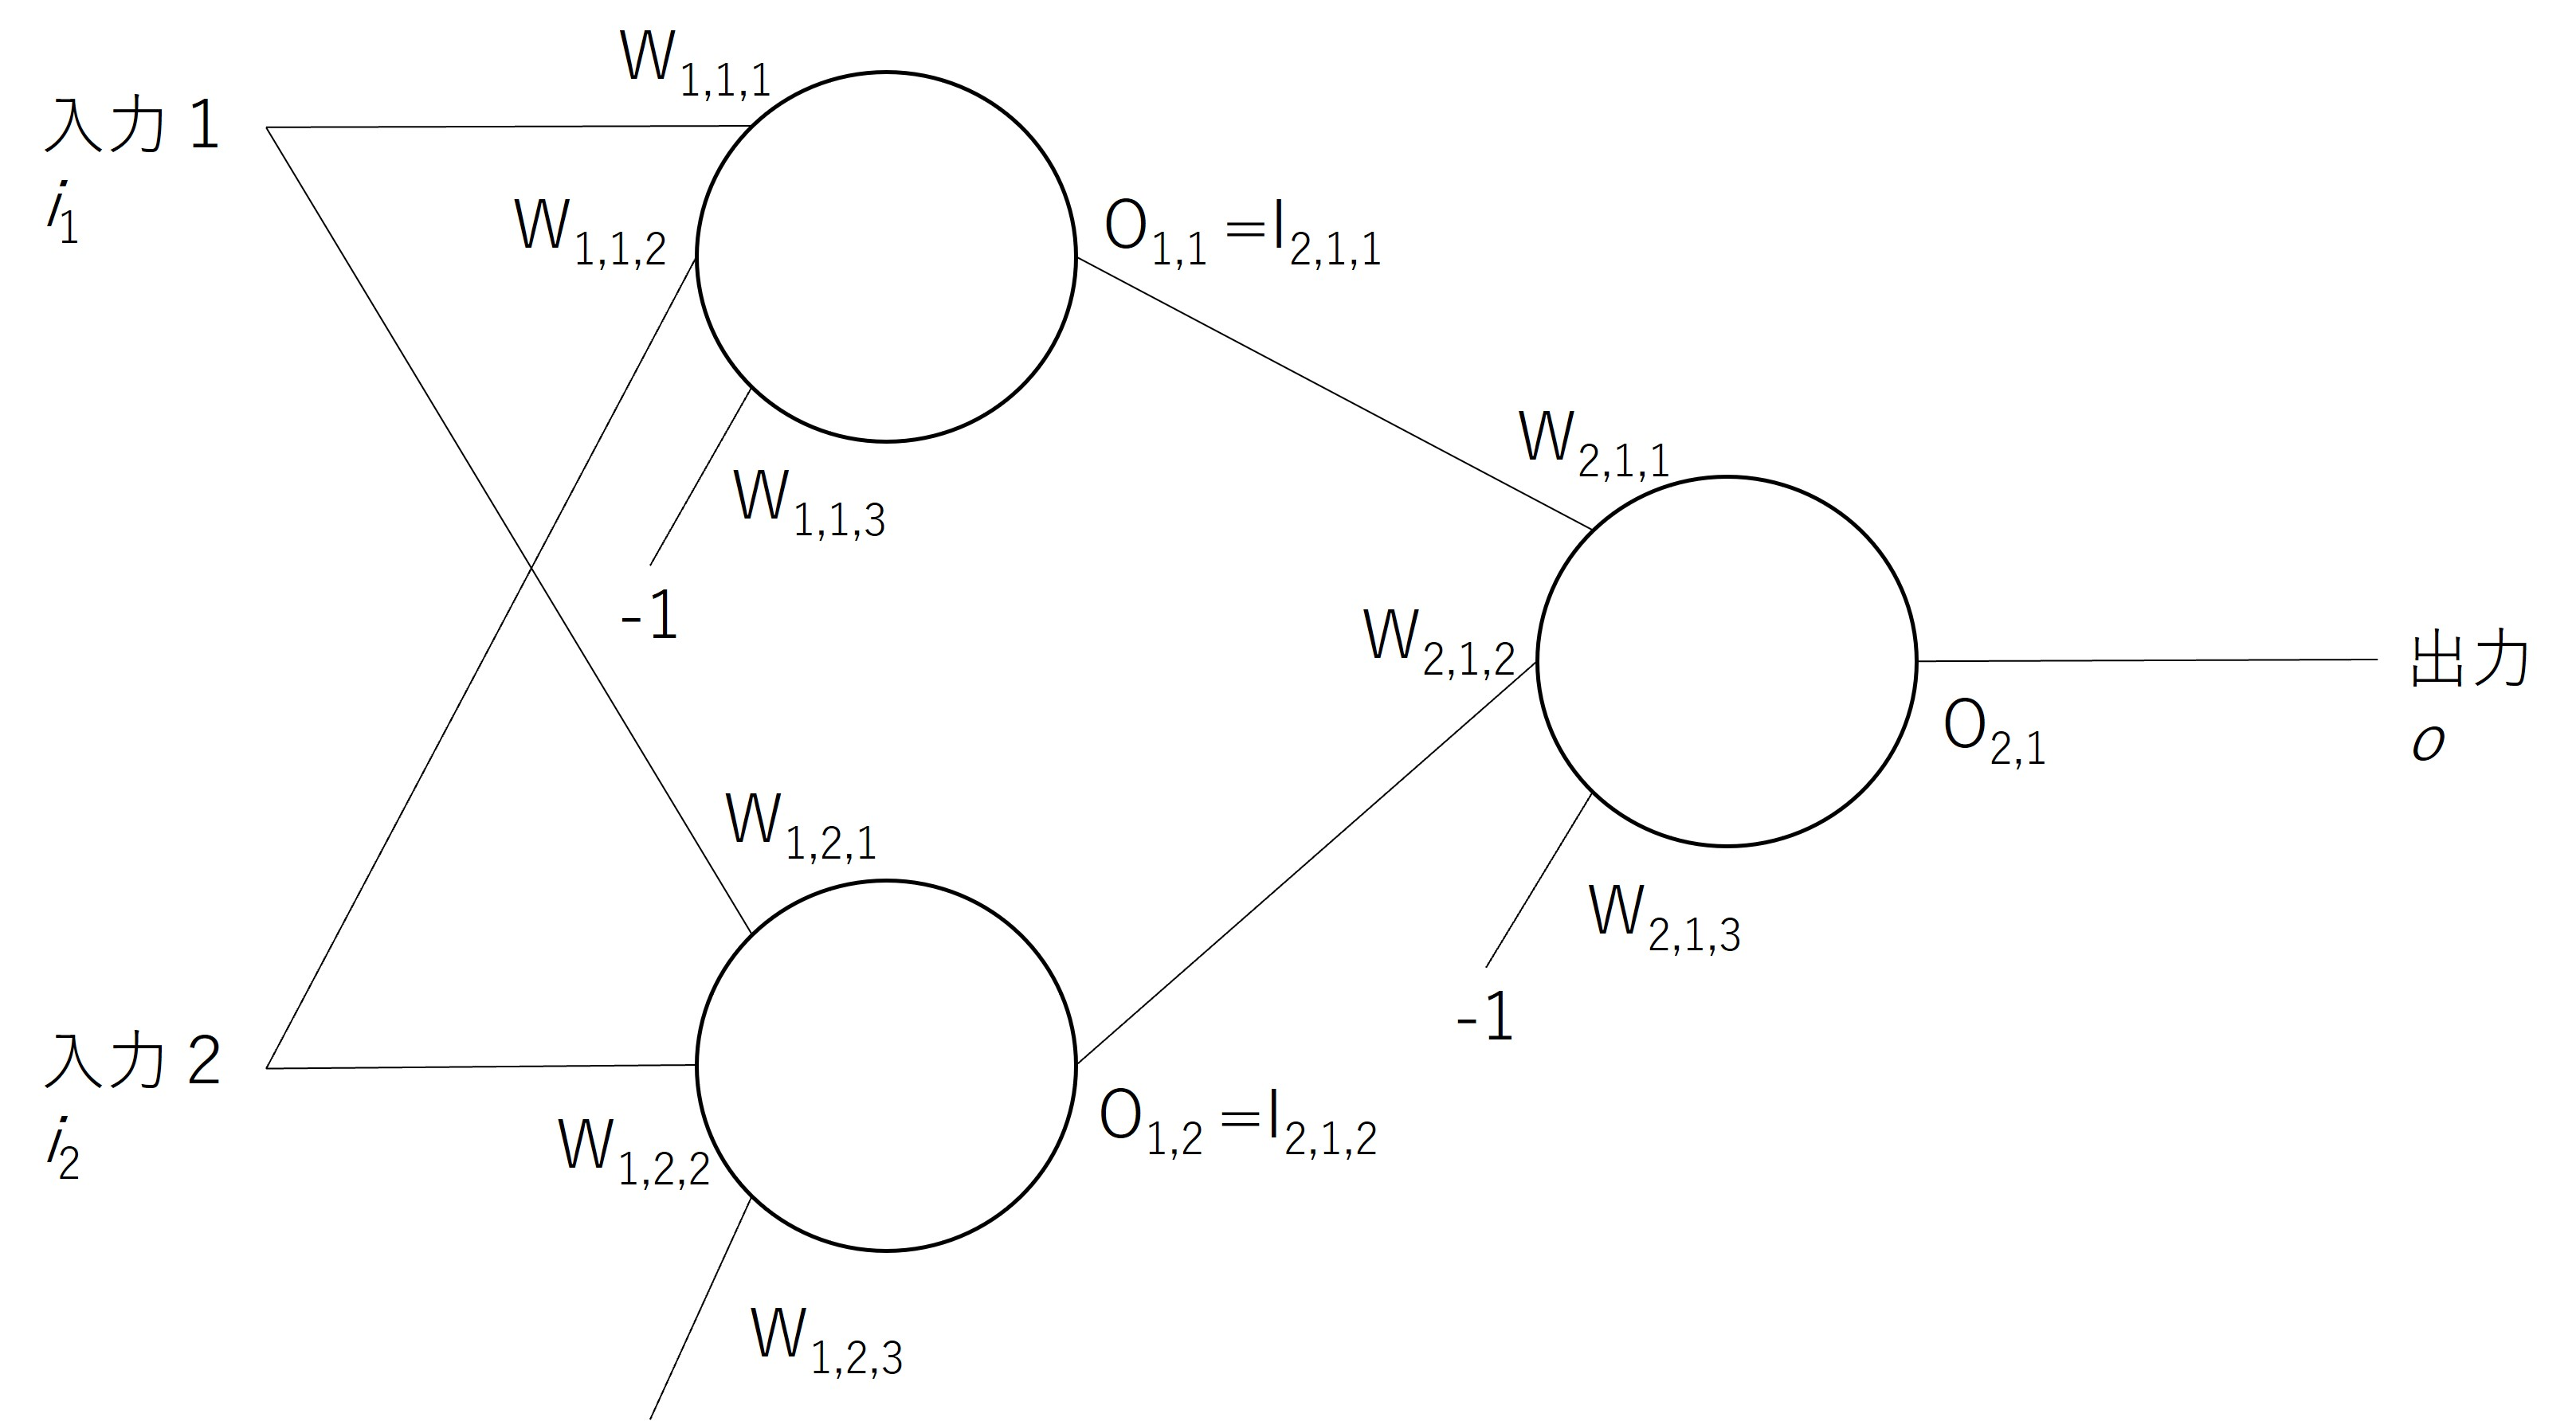

ニューラルネットは上図のように２入力１出力となる。また、各ニューロンは３入力をもち、そのうち１個の入力値は（ー１）で固定である。この入力の重み($w_{l,n,3}$\)は閾値を表す。

### 最急降下法

このニューラルネットで最適な重み（$wの値（9個）$）を最適にする。ここで、最適とは「ある評価関数の値を小さくすること」である。つまり、評価関数の値を小さくするには$wの値（9個)$をどのようにするのが良いかというのが学習の問題となる。

$w$の値の最適値を求めるために最急降下法を使う。  
最急降下法とは小さくしたい値（評価関数の値）を変更できるパラメータで偏微分して（傾きを求めて）、その逆方向に進むものである。（山を下っていくことと似ている）

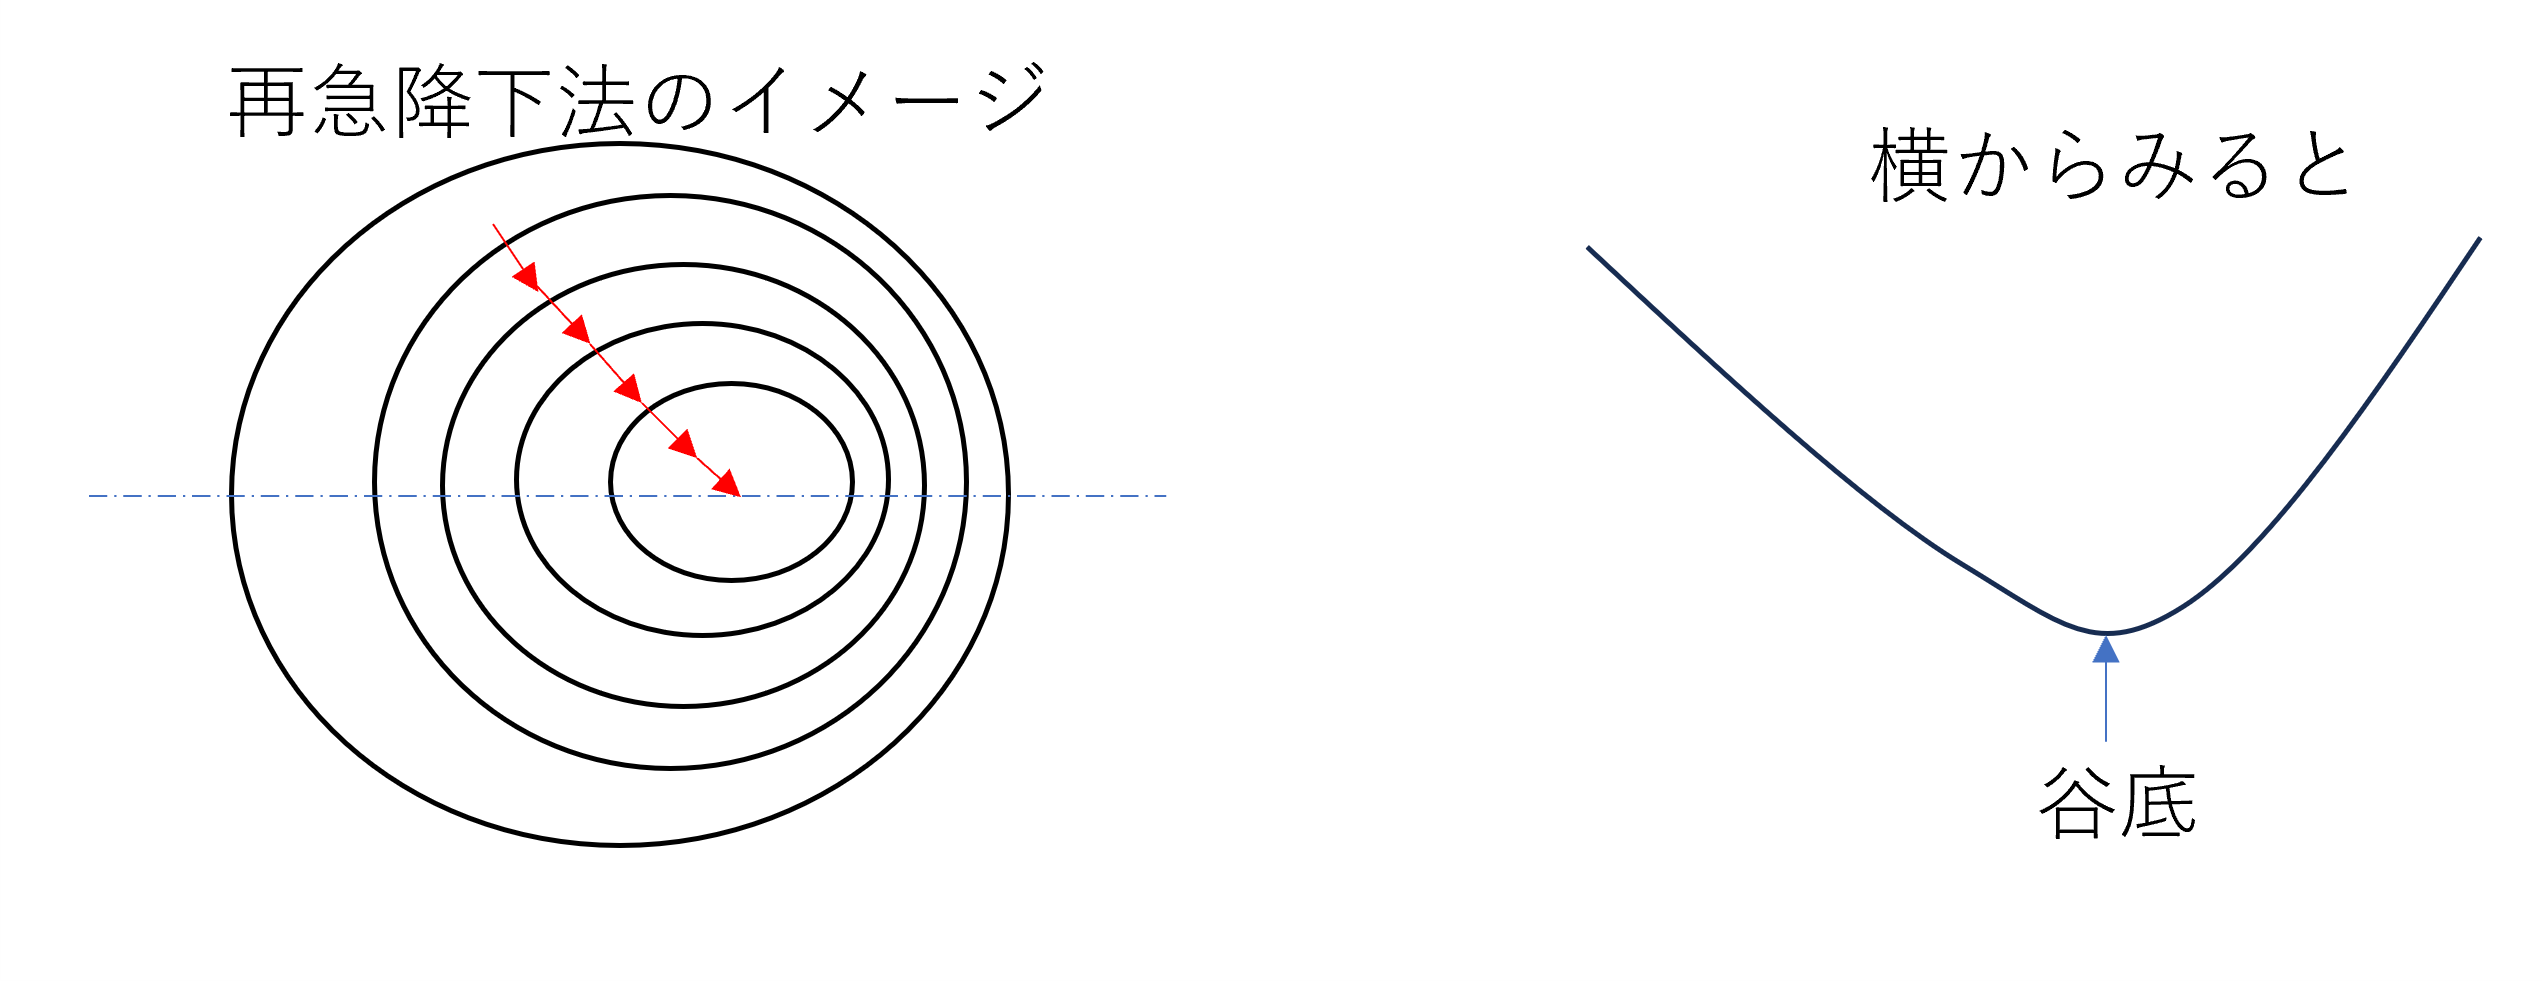

評価関数を適切に設定することで学習を進めることができる。

今回は、評価関数として２乗誤差を用いる。つまり、ニューラルネットへの入力パターンに対して正しい出力（これを教師データという）を与え、ニューラルネットは入力パターンに対して教師データのような出力を出すように学習する。（つまり、教師データと現在の出力の２乗誤差を小さくするように学習する）

#### ２乗誤差

２乗誤差は下記のようになる。ここで$T_i$は教師データ、$o_i$は出力である。

$E=\sum{(o_i-T_i)^2}=(o-T)^2　　　(今回は出力が１つなので最後の式では\sumがない）$

#### 重みを変化させる値（$\Delta{w}$）（偏微分に負の符号がついた値）
２層目（出力がある層）$\Delta{w_{2,1,w}}=-\frac{\partial E}{\partial w_{2,1,w}}=-\frac{\partial u_{2,1}}{\partial w_{2,1,w}}\frac{\partial o_{2,1}}{\partial u_{2,1}}\frac{\partial E}{\partial o_{2,1}}$

１層目（ニューロン２個の層）$\Delta{w_{1,n,w}}=-\frac{\partial E}{\partial w_{1,n,w}}=-\frac{\partial u_{1,n}}{\partial w_{1,n,w}}\frac{\partial o_{1,n}}{\partial u_{1,n}}\frac{\partial u_{2,1}}{\partial o_{1,n}}\frac{\partial o_{2,1}}{\partial u_{2,1}}\frac{\partial E}{\partial o_{2,1}}$

上式で$\frac{\partial o}{\partial u}\frac{\partial E}{\partial o}$の部分を$\delta$とおけば

２層目（出力がある層）$\Delta{w_{2,1,w}}=-\frac{\partial E}{\partial w_{2,1,w}}=-\frac{\partial u_{2,1}}{\partial w_{2,1,w}}\delta_{2,1}　　（\delta_{2,1}=\frac{\partial o_{2,1}}{\partial u_{2,1}}\frac{\partial E}{\partial o_{2,1}}）$

１層目（ニューロン２個の層）$\Delta{w_{1,n,w}}=-\frac{\partial E}{\partial w_{1,n,w}}=-\frac{\partial u_{1,n}}{\partial w_{1,n,w}}\delta_{1,n}　　(ただし，\delta_{1,n}=\frac{\partial o_{1,n}}{\partial u_{1,n}}\frac{\partial E}{\partial o_{1,n}}=\frac{\partial o_{1,n}}{\partial u_{1,n}}\frac{\partial u_{2,1}}{\partial o_{1,n}}\frac{\partial o}{\partial u_{2,1}}\frac{\partial E}{\partial o}=\frac{\partial o_{1,n}}{\partial u_{1,n}}\frac{\partial u_{2,1}}{\partial o_{1,j}}\delta_{2,1})$

つまり，各ニューロンにおける$\delta$を出力側から順次決めていけば各重みの更新量（$\Delta w$）を順次決めていけることを示している．出力側から逆伝搬するために，誤差逆伝搬学習則と呼ばれる．

式における$\frac{\partial o_{l,n}}{\partial u_{l,n}}$とは活性化関数を微分したものである．

これはシグモイド関数の場合下記のようになる．

$\frac{\partial}{\partial u}(\frac{1}{1+\exp(-u)})=\frac{\exp(-u)}{(1+\exp(-u))^2}=\frac{1}{1+\exp(-u)}\frac{1}{1+\exp(u)}$

２乗誤差を偏微分した値（$\frac{\partial E}{\partial o}$）は定義より下記のようになる．

$\frac{\partial E}{\partial o}=2(o-T)$

また，式における$\frac{\partial u_{l,n}}{\partial w_{l,n,w}}$とはそのニューロンへの入力値のことである．さらに，$\frac{\partial u_{2,1}}{\partial o_{1,n}}$とは結合の重みのことである．従って，１層目のニューロンの出力を$o_{1,n}$とすると上式は下記のように表せる．

$E=(o-T)^2$

$\delta_{2,1}=\frac{\partial o}{\partial u_{2,1}}\frac{\partial E}{\partial o}=\frac{1}{1+\exp(-u_{2,1})}\frac{1}{1+\exp(u_{2,1})}2(o-T)$

$\Delta w_{2,1,w}=-o_{1,w}\delta_{2,1}$

$\delta_{1,n}=\frac{\partial o_{1,n}}{\partial u_{1,n}}\frac{\partial E}{\partial o_{1,n}}=\frac{\partial o_{1,n}}{\partial u_{1,n}}\frac{\partial u_{2,1}}{\partial o_{1,n}}\delta_{2,1}=\frac{1}{1+\exp(-u_{1,n})}\frac{1}{1+\exp(u_{1,n})}w_{2,1,w}\delta_{2,1}$

$\Delta{w_{1,n,w}}=-i_{1,n,w}\delta_{1,n}$

#### ステップサイズ

最急降下法では１回の更新で進む量が適切であれば，評価関数の値は小さくなる（図１）．しかし，更新の量が大きすぎると評価関数の値が小さくなることを保証できない（図２）．そこで，ステップサイズα（0<α<1）を乗することでいつでも評価関数の値が小さくなるようにしなければならない．

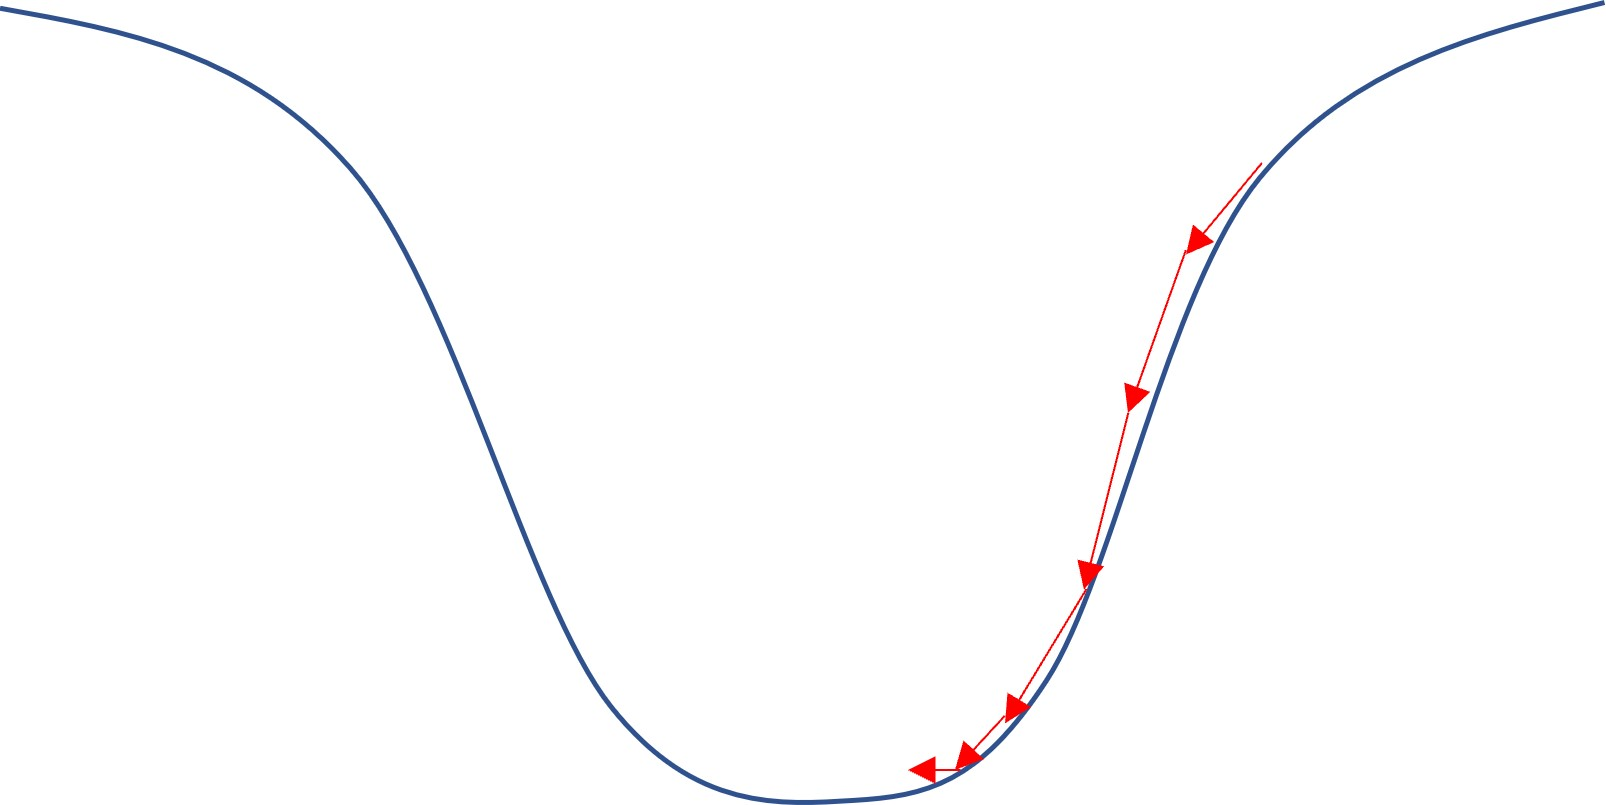

図１．最急降下法
　　
　　
　　

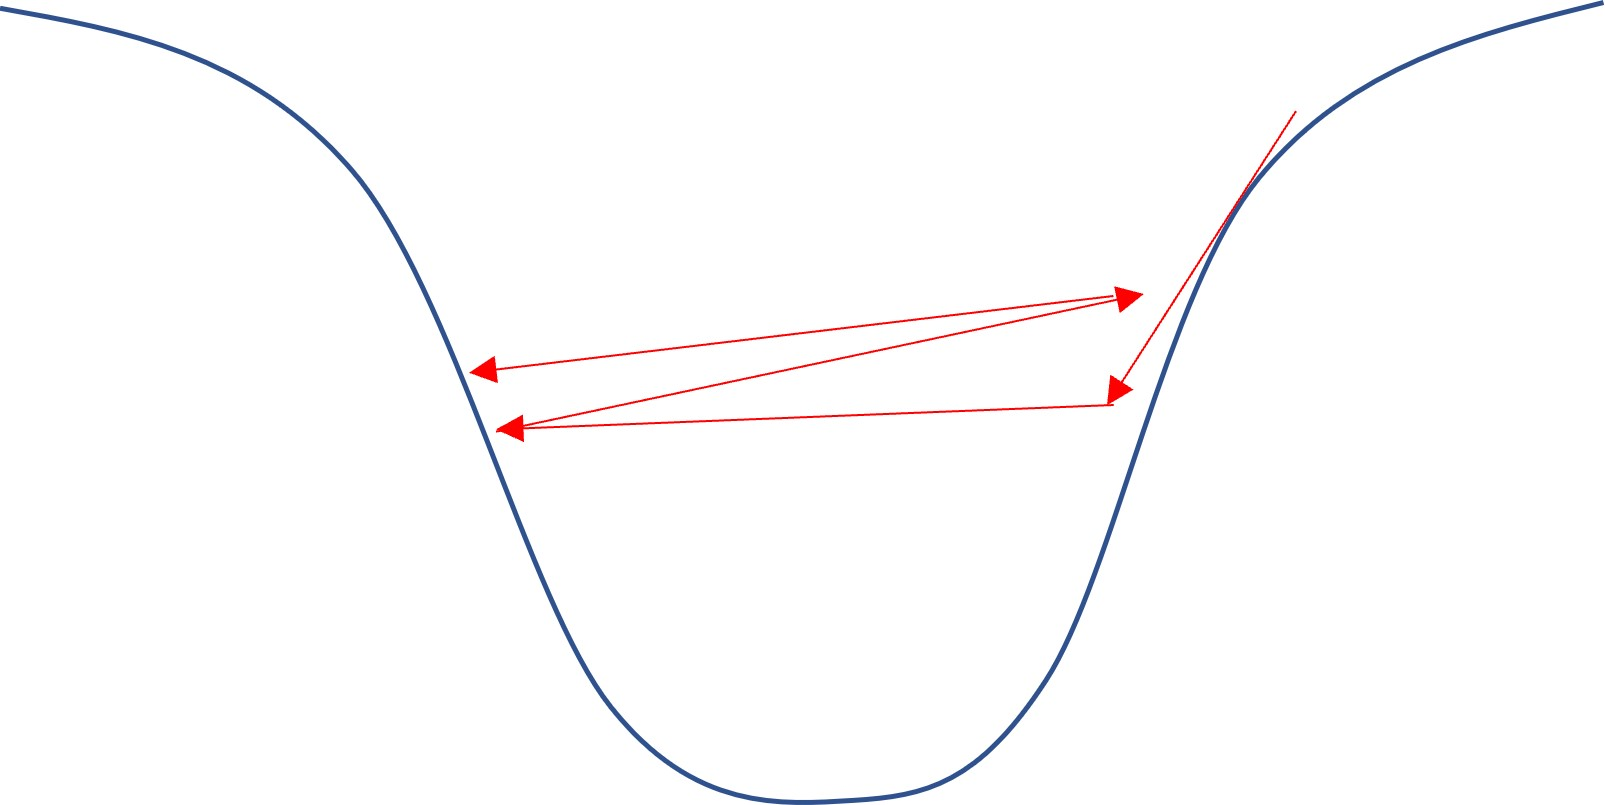

図２．最急降下法（更新量が大きすぎる場合）

## 課題

2入力1出力のニューラルネットを作成する．２入力は０～１の座標（X軸とY軸の値）とし，１辺が０～１（長さ１）の正方形（この正方形の横と縦の座標を２つの入力とする）の中に図形を描画する．（入力が(0.5 , 0.5)の時は正方形の中心となる）　学習する図形の中では出力１とし，図形の外では出力０として図形を学習する．図形は三角形としてニューラルネットは重みを学習するように構成する．提出はこのファイルとする．

<Figure size 1000x1000 with 0 Axes>

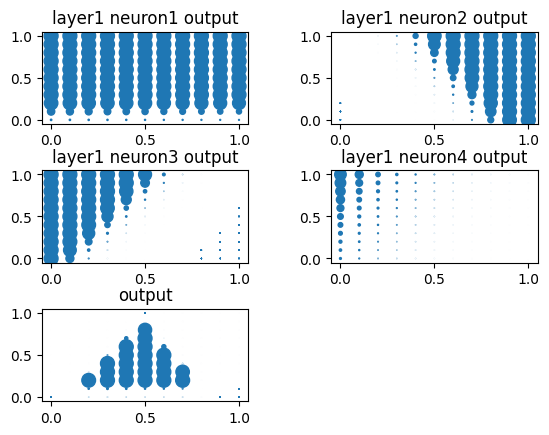

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# シグモイド関数
def sigmoid(u):
    return 1/(1+np.exp(-u))

# ニューロンの計算
def neuron(xx, n):
    x = xx.copy()
    x.append(-1)  # バイアス項
    u = np.dot(x, w[n])
    o = sigmoid(u)
    return o

# 教師データの設定
# 三角形の頂点
triangle_points = [(0.2, 0.2), (0.8, 0.2), (0.5, 0.8)]

# 三角形内にあるかを判断する関数
# 外積を利用して判断
def is_in_triangle(x, y, points):
    def sign(p1, p2, p3):
        return (p1[0] - p3[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p3[1])

    b1 = sign((x, y), points[0], points[1]) < 0.0
    b2 = sign((x, y), points[1], points[2]) < 0.0
    b3 = sign((x, y), points[2], points[0]) < 0.0

    return ((b1 == b2) and (b2 == b3))

# > ただし，下の図のように点の数を減らしすぎると三角形以外の青い四角形等にも解があり，他の学習結果となる場合となることも考えられるので注意が必要である．（課題補足より）
# 0から1まで0.1刻みの教師データを作成した。点の数増やせばなんとかなると思った。
x = []
y = []
t = []
for i in np.arange(0, 1.1, 0.1):
    for j in np.arange(0, 1.1, 0.1):
        x.append(i)
        y.append(j)
        if is_in_triangle(i, j, triangle_points):
            t.append(1)
        else:
            t.append(0)

# 初期の重みの設定
# 今回は三角形は3辺なので3+1=4個、一層目にニューロンを設定した

w1 = np.random.randn(3)  # ニューロン1の重み
w2 = np.random.randn(3)  # ニューロン2の重み
w3 = np.random.randn(3)  # ニューロン3の重み
w4 = np.random.randn(3)  # ニューロン4の重み
w5 = np.random.randn(5)  # 出力ニューロンの重み
w = np.array([w1, w2, w3, w4, w5], dtype=object)  # 重みの配列

# ステップサイズの設定
step_size = 0.3

# 学習の実行
epochs = 10000  # 学習の繰り返し回数。1000だと足りなかったので10000に増やしました。

for epoch in range(epochs):
    for i in range(len(x)):
        # 順伝播
        b1 = neuron([x[i], y[i]], 0)
        b2 = neuron([x[i], y[i]], 1)
        b3 = neuron([x[i], y[i]], 2)
        b4 = neuron([x[i], y[i]], 3)
        a = [b1, b2, b3, b4]
        out = neuron(a, 4)
        
        # 誤差の計算
        error = t[i] - out

        # 二乗誤差の勾配計算
        delta_out = 2 * (out - t[i]) * out * (1 - out)  # 勾配を計算しています。out * (1 - out)はシグモイド関数の微分です

        # 出力層の重みの更新
        for j in range(4):
            w[4][j] -= step_size * delta_out * a[j]  # ステップサイズを掛けて重みを更新
        w[4][4] -= step_size * delta_out * -1

        # 第一層の重みの更新（ここ怪しい、合ってますか？）
        deltas = []
        for n in range(4):
            delta_h = delta_out * w[4][n] * a[n] * (1 - a[n])  # 隠れ層の勾配計算
            deltas.append(delta_h)
            w[n][0] -= step_size * delta_h * x[i]  # ステップサイズを掛けて重みを更新
            w[n][1] -= step_size * delta_h * y[i]
            w[n][2] -= step_size * delta_h * -1


# プロット
plot1 = []
plot2 = []
plot3 = []
plot4 = []
plotout = []

for i in range(len(x)):
    b1 = neuron([x[i], y[i]], 0)
    b2 = neuron([x[i], y[i]], 1)
    b3 = neuron([x[i], y[i]], 2)
    b4 = neuron([x[i], y[i]], 3)
    a = [b1, b2, b3, b4]
    out = neuron(a, 4)
    plot1.append(b1 * 100)
    plot2.append(b2 * 100)
    plot3.append(b3 * 100)
    plot4.append(b4 * 100)
    plotout.append(out * 100)

plt.figure(figsize=(10, 10))
fig = plt.figure()

ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)

plt.subplots_adjust(hspace=0.5, wspace=0.4)

ax1.set_title("layer1 neuron1 output")
ax2.set_title("layer1 neuron2 output")
ax3.set_title("layer1 neuron3 output")
ax4.set_title("layer1 neuron4 output")
ax5.set_title("output")
ax1.scatter(x, y, s=plot1)
ax2.scatter(x, y, s=plot2)
ax3.scatter(x, y, s=plot3)
ax4.scatter(x, y, s=plot4)
ax5.scatter(x, y, s=plotout)
plt.show()


#### 課題補足

入力として例えば０～１を０．１ずつ１１点とりX軸とY軸で計１２１点の教師データ（XとYの時に図の中では１を出力，図の外では０を出力とする）を作る方法もあるが，教師データが多いと学習に時間がかかる．そこで，XとYの点を少なくしても同様の学習ができるようにすることもできる．例えば下図の上の図では９点でオレンジ色の三角形を表している（９個の点で青いところは教師データが０，赤いところは教師データを１とする．例えば一番上の赤い点は座標が（0.6, 0.9）であるのでニューラルネットへの入力値は[0.6,0.9]である．この座標は学習させる三角形の内部であるので教師データは１である．））．ただし，下の図のように点の数を減らしすぎると三角形以外の青い四角形等にも解があり，他の学習結果となる場合となることも考えられるので注意が必要である．

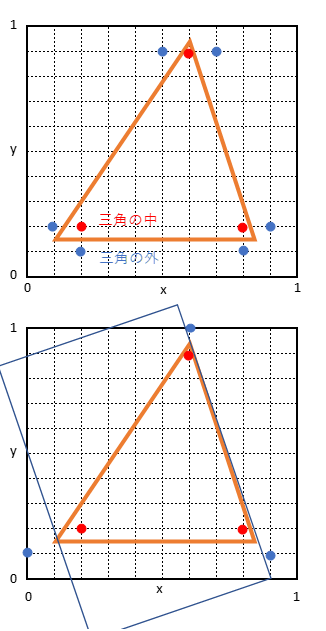